# Prisma Diagram

Here we provide a **P**referred **R**eporting **I**tems for **S**ystematic Reviews and **M**eta-**A**nalyses (PRISMA) diagram.  PRSIMA aims to improve the reporting of systematic reviews.  Full details of the PRISMA statement can be found on at [https://prisma-statement.org](https://prisma-statement.org)

The flow diagram  generated visualises the manuscripts returned from multiple database searches, duplicates, titles/abstracts screened in/out; and manuscripts included excluded during full text screening.

## Overview of notebook

This notebook uses the `graphviz` library to generate a flow diagram.  It is separated into four sections: imports; a function to create the flow diagram; a script to populate a `dict` with the findings from our study; and the code to run function and save the image to file.

## 1. Imports

We have generated our PRSIMA diagram using `graphviz`

In [1]:
from graphviz import Digraph
from graphviz import Graph
import pydot

## 2. Functions to create diagram

In [2]:
def graph_prisma(data, filename='prisma.dot'):
    '''
    Create PRISMA flow diagram for literature review

    The output is saved in a dot format file.

    Params:
    -------
    data: dict
      Dictionary of data items
      
    Returns:
    --------
    Diagraph

    '''
    g = Digraph('G', filename=filename)

    #g.attr(label=r"\n\nPrisma Flow Diagram")
    g.attr(fontsize='14')

    node1_txt = f"Records identified from: \nScopus " \
        + f"(n = {str(data['scopus_n'])}) \nPubMed " \
        + f"(n = {str(data['pubmed_n'])})"
    node1 = g.node('A', node1_txt, shape='rectangle')

    node2_txt = f"Records removed before screening:\n" \
        + f"duplicates (n = {str(data['n_duplicates'])})"
    node2 = g.node('B', node2_txt, shape='rectangle')

    node3_txt = f"Records screened\n (n = {str(data['n_title_abstract'])})"
    node3 = g.node('C', node3_txt, shape='rectangle')

    node4_txt = f"Records excluded\n " \
        + f"(n = {str(data['n_abstracts_excluded'])})"
    node4 = g.node('D', node4_txt, shape='rectangle')

    node5_txt = f"Papers sought for retrieval\n " \
        + f"(n = {str(data['n_to_retrieve'])})"
    node5 = g.node('E', node5_txt, shape='rectangle')

    node6_txt = f"Papers not retrieved\n (n = {str(data['n_not_retrieved'])})"
    node6 = g.node('F', node6_txt, shape='rectangle')

    node6_txt = f"Papers assessed for eligibility\n" \
        + f"(n = {str(data['n_assessed'])})"
    node6 = g.node('G', node6_txt, shape='rectangle')

    node7_txt = f"Studies included in review\n(n = {str(data['n_included'])})"
    node7 = g.node('H', node7_txt, shape='rectangle')

    # excluded reasons
    node7_txt = f"Studies excluded:\n" \
        + f"{data['exclude_reason1']} (n = {str(data['n_exclude_reason1'])})\n"\
        + f"{data['exclude_reason2']} (n = {str(data['n_exclude_reason2'])})\n"\
        + f"{data['exclude_reason3']} (n = {str(data['n_exclude_reason2'])})"
    node7 = g.node('I', node7_txt, shape='rectangle')

    g.edges(['AB', 'AC', 'CD', 'CE', 'EF', 'EG', 'GH', 'GI'])


    # subnodes for real world decisions in same graph
    snode1_txt = f"Available models\n n = {str(data['available_models_n'])}" 
    snode1 = g.node('H0', snode1_txt)

    snode2_txt = f"Included studies \n n = {str(data['n_included'])}"
    snode2 = g.node('H1', snode2_txt)

    snode3_txt = f"Percentage of models shared \n {str(data['percent'])}"
    snode3 = g.node('H2', snode3_txt)

    with g.subgraph(name='cluster_1') as c:
        c.attr(color='blue')
        c.node_attr['style'] = 'filled'
        c.edges([('H0', 'H2'), ('H1', 'H2')])
        c.attr(label="Interim results")

    g.save(filename)
    return g

## 3. Diagram Data Input
> To be updated to read from data file. Part can be generated by analysis.ipynb. Bits like scopus_n and n_duplicates will be hardcoded.

In [3]:
#  script for prisma
data = {}
data['scopus_n'] = 534
data['pubmed_n'] = 407
data['n_duplicates'] = 2 + 208
data['n_title_abstract'] = 532 + 199
data['n_abstracts_excluded'] = 131 + (199 - 83)
data['n_ft_excluded'] = 0
data['n_to_retrieve'] = 401 + 83
data['n_not_retrieved'] = "?"
data['n_assessed'] = "4"
data['n_included'] = "422"
data['n_excluded'] = "?"
data['exclude_reason1'] = "Reason 1"
data['exclude_reason2'] = "Reason 2"
data['exclude_reason3'] = "Reason 3"
data['n_exclude_reason1'] = "?"
data['n_exclude_reason2'] = "?"
data['n_exclude_reason3'] = "?"
data['available_models_n'] = 38
data['percent'] = "~9%"

## 4. Create Diagram

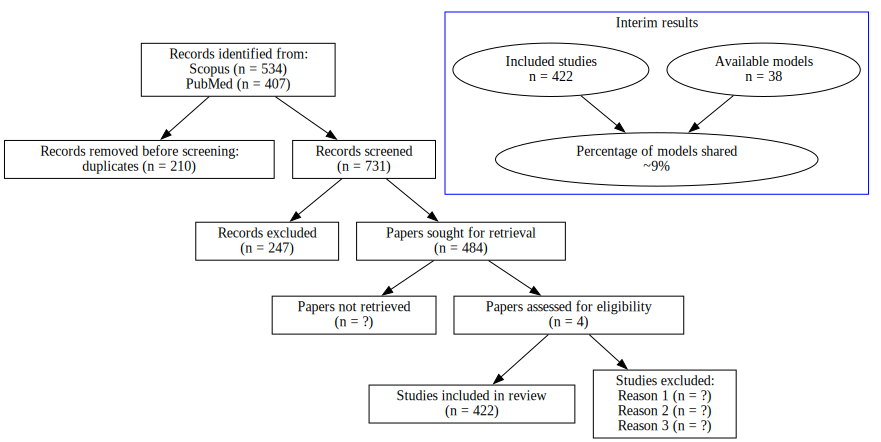

In [4]:
g = graph_prisma(data)
g

In [5]:
# save to file
(graph,) = pydot.graph_from_dot_file('prisma.dot')
graph.set_dpi(300)
graph.write_png('prisma.png')